In [2]:
%load_ext autoreload
%autoreload 2
from mutabledataset import GermanSimDataset
from agent import RationalAgent
from simulation import Simulation
from learner import LogisticLearner

import plot
import numpy as np
import pandas as pd
def print_table(df):
    young = plot.count_df(df, [{'age': 0, 'credit_h': 1}, {'age': 0, 'credit_h': 0}])
    young_n = young.sum()
    young = young / young.sum() * 100

    old = plot.count_df(df, [{'age': 1, 'credit_h': 1}, {'age': 1, 'credit_h': 0}])
    old_n = old.sum()
    old = old / old.sum() * 100
    tbl = pd.DataFrame(data=[young,old], index=['Young ('+str(young_n)+')', 'Old ('+str(old_n)+')'], columns=['Good Credit', 'Bad Credit'])
    return (tbl)
    #plot.plot_pie(sim.dataset_df, [{'age': 0, 'credit_h': 1},
    #                               {'age': 0, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Young')

    #plot.plot_pie(sim.dataset_df, [{'age': 1, 'credit_h': 1},
    #                               {'age': 1, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Old')

    #plot.plot_pie(sim.dataset_new_df, [{'age': 0, 'credit_h': 1},
    #                               {'age': 0, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Young')

    #plot.plot_pie(sim.dataset_new_df, [{'age': 1, 'credit_h': 1},
    #                               {'age': 1, 'credit_h': 0}],
    #              ['Good', 'Bad'], 'Old')



/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWar

# Logistic Regression

In [3]:
g = GermanSimDataset(mutable_features=['savings'],
                     domains={'savings': 'auto'},
                     discrete=['savings'])
sim = Simulation(g,
                 RationalAgent,
                 LogisticLearner(),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)


Train:  (500, 58) , Test:  (500, 58)


/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.702
Accuracy (h) post 0.78
Accuracy (h*) post 0.776
eps =  0.0
y=1 788.0  <-  700.0


In [4]:
df,_ = sim.train.convert_to_dataframe(de_dummy_code=True)
print(np.array(df['age'] == 0).sum())

79


### Mutable Features

young


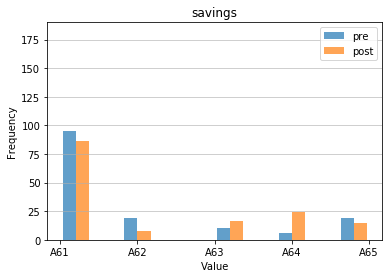

old


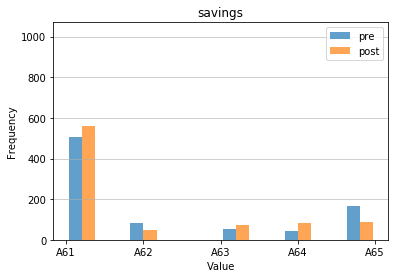

,Good Credit,Bad Credit
Young (149),74.496644,25.503356
Old (851),88.719154,11.280846


In [5]:
print("young")
plot.plot_mutable_features(sim,selection_criteria={'age':0})
print("old")
plot.plot_mutable_features(sim,selection_criteria={'age':1})

### Young, Old (Pre Simulation)

In [5]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),55.033557,44.966443
Old (851),79.788484,20.211516


### Young, Old (Post Simulation)

In [6]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),81.208054,18.791946
Old (851),88.366627,11.633373


# Logistic Regression with Reweighing

In [10]:
from learner import ReweighingLogisticLearner

g = GermanSimDataset(mutable_features=['savings'],
                     domains={'savings': 'auto'},
                     discrete=['savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 ReweighingLogisticLearner(privileged_groups,
                                           unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)

Train:  (500, 57) , Test:  (500, 57)
before reweighing (meandiff): -0.05833333333333324 after: 2.220446049250313e-16


/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.742
Accuracy (h) post 0.766
before reweighing (meandiff): -0.06428571428571428 after: 1.1102230246251565e-16
Accuracy (h*) post 0.764
eps =  0.0
y=1 735.0  <-  700.0


### Young, Old (Pre Simulation)

In [11]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),82.550336,17.449664
Old (851),81.198590,18.801410


### Young, Old (Post Simulation)

In [12]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),87.919463,12.080537
Old (851),83.901293,16.098707


### Mutable Features

young


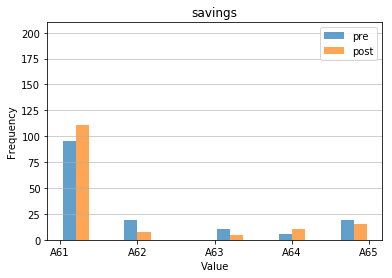

old


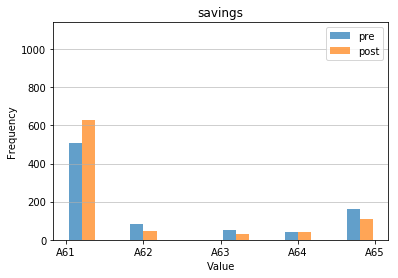

In [13]:
print("young")
plot.plot_mutable_features(sim,selection_criteria={'age':0})
print("old")
plot.plot_mutable_features(sim,selection_criteria={'age':1})

### Comments
Statistical parity difference improved.

In [10]:
df = sim.dataset_df
unique_elements, counts_elements = np.unique(df[df['age'] == 0]['status'], return_counts=True)
print(unique_elements, counts_elements/sum(counts_elements))

unique_elements, counts_elements = np.unique(df[df['age'] == 1]['status'], return_counts=True)
print(unique_elements, counts_elements/sum(counts_elements))

['A11' 'A12' 'A13' 'A14'] [0.38255034 0.30872483 0.05369128 0.25503356]
['A11' 'A12' 'A13' 'A14'] [0.25499412 0.26204465 0.06462985 0.41833137]


Above shows, that young people have less money in their bank account. Bank account balance is quite relevant for the output. Thus we can still infer age via bank account.

After playing around with the other fairness measures on the web application, I doubt that any of those will change this outcome for this particular dataset + protected attribute.

Other options: (basically do some actual affirmative action)
- play around with thresholds, see what happens
- different cost distribution, subsidize skill investement (feature manipulation)
- 
All the fairness measures in AIF360 are not affirmative action

In [11]:
from sklearn.linear_model import LogisticRegression

print(sim.dataset.label_names)
reg = LogisticRegression(solver='liblinear',max_iter=1000000000,C=1000000000000000000000.0).fit(sim.dataset.features, sim.dataset.labels.ravel())

df = pd.DataFrame(data=sim.dataset.features, columns=sim.dataset.feature_names)
data = plot._df_selection(df, {'age': 1})
print(list(reg.predict([data.values[0]])))

# next steps: implement modified decision function that enforces statistical parity...

['credit']
[1.0]


## Enforce Statistical Parity (threshold boost for unprivileged)

In [30]:
from learner import StatisticalParityLogisticLearner

g = GermanSimDataset(mutable_features=['savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 StatisticalParityLogisticLearner(privileged_groups,
                                           unprivileged_groups, 0.0000001),
                 lambda size: np.abs(np.random.normal(loc=1.0,size=size)))
 
sim.start_simulation(include_protected=True)

Train:  (500, 57) , Test:  (500, 57)
{'age': 1}


/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.618
Accuracy (h) post 0.718
{'age': 1}
Accuracy (h*) post 0.714
eps =  0.0
y=1 772.0  <-  700.0


### Young, Old (Pre Simulation)

In [31]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),79.865772,20.134228
Old (851),80.258519,19.741481


### Young, Old (Post Simulation)

In [32]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),82.550336,17.449664
Old (851),87.191539,12.808461


### Mutable Features

young


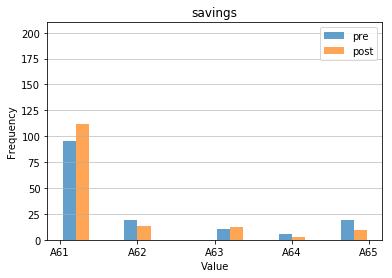

old


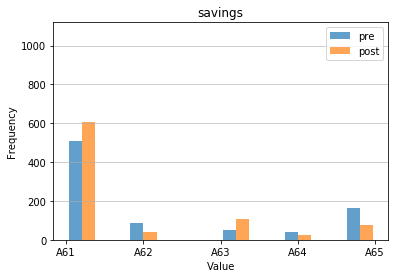

In [33]:
print("young")
plot.plot_mutable_features(sim,selection_criteria={'age':0})
print("old")
plot.plot_mutable_features(sim,selection_criteria={'age':1})

# Adversial Debiasing

In [24]:
from learner import AdversialDebiasingLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 AdversialDebiasingLogisticLearner(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=0.5,size=size)))
 
sim.start_simulation(include_protected=True)

Train:  (500, 57) , Test:  (500, 57)


/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/.local/share/virtualenvs/simulation-lLjf8lvH/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)


epoch 0; iter: 0; batch classifier loss: 0.781963; batch adversarial loss: 0.917923
epoch 1; iter: 0; batch classifier loss: 0.702226; batch adversarial loss: 1.025686
epoch 2; iter: 0; batch classifier loss: 0.657851; batch adversarial loss: 1.112174
epoch 3; iter: 0; batch classifier loss: 0.658134; batch adversarial loss: 1.139657
epoch 4; iter: 0; batch classifier loss: 0.524391; batch adversarial loss: 1.235015
epoch 5; iter: 0; batch classifier loss: 0.580262; batch adversarial loss: 1.305564
epoch 6; iter: 0; batch classifier loss: 0.563693; batch adversarial loss: 1.273186
epoch 7; iter: 0; batch classifier loss: 0.552742; batch adversarial loss: 1.337105
epoch 8; iter: 0; batch classifier loss: 0.597729; batch adversarial loss: 1.245800
epoch 9; iter: 0; batch classifier loss: 0.582170; batch adversarial loss: 1.270493
epoch 10; iter: 0; batch classifier loss: 0.578563; batch adversarial loss: 1.318953
epoch 11; iter: 0; batch classifier loss: 0.598464; batch adversarial loss:

### Young, Old (Pre Simulation)

In [25]:
print_table(sim.dataset_df)

,Good Credit,Bad Credit
Young (149),47.651007,52.348993
Old (851),92.244418,7.755582


### Young, Old (Post Simulation)

In [26]:
print_table(sim.dataset_new_df)

,Good Credit,Bad Credit
Young (149),77.852349,22.147651
Old (851),97.062280,2.937720


# EqOdds Postprocessing

In [40]:
from learner import EqOddsPostprocessingLogisticLearner

g = GermanSimDataset(mutable_features=['status', 'savings'],
                     domains={'savings': 'auto', 'status': 'auto'},
                     discrete=['status', 'savings'],
                     protected_attribute_names=['age'],
                     privileged_classes=[lambda x: x >= 25],
                     features_to_drop=['personal_status', 'sex'])

privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]

sim = Simulation(g,
                 RationalAgent,
                 EqOddsPostprocessingLogisticLearner(privileged_groups = privileged_groups,
                          unprivileged_groups = unprivileged_groups),
                 lambda size: np.abs(np.random.normal(loc=0.5,size=size)))
 
sim.start_simulation(include_protected=True)

Train:  (500, 57) , Test:  (500, 57)


/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature status
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)
/home/dan/ETH/ba/simulation/mutabledataset.py:84: UserWarning: Use set of values present in dataset to infer domain for feature savings
  warnings.warn("Use set of values present in dataset to infer domain for feature " + ft)


Accuracy (h) pre 0.0
Accuracy (h) post 0.0
Accuracy (h*) post 0.0
eps =  0.0
y=1 700.0  <-  700.0


### Young, Old (Pre Simulation)

In [ ]:
print_table(sim.dataset_df)

### Young, Old (Post Simulation)

In [ ]:
print_table(sim.dataset_new_df)